In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
train_df = pd.read_csv("/Users/sihoon/Downloads/titanic (2)/train.csv")
test_df = pd.read_csv("/Users/sihoon/Downloads/titanic (2)/test.csv")
submission = pd.read_csv("/Users/sihoon/Downloads/titanic (2)/gender_submission.csv")

In [110]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [111]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [112]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [114]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
plt.style.use("ggplot") # 표시 스타일 지정

In [116]:
train_df[['Embarked', 'Survived', 'PassengerId']]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [117]:
train_df[['Embarked', 'Survived', 'PassengerId']].dropna() # 결측치 제거

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


In [118]:
train_df[["Embarked", "Survived", "PassengerId"]].groupby(["Embarked", "Survived"]).count()
# 승선한 항에 따른 생존 빈도

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [119]:
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].groupby(["Embarked", "Survived"]).count().unstack()
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: xlabel='Embarked'>

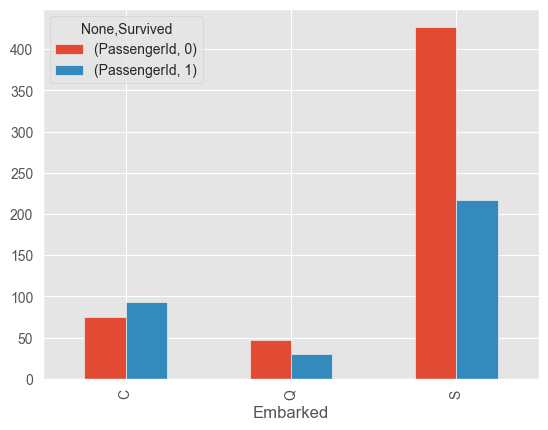

In [120]:
embarked_df.plot.bar(stacked = False)

In [121]:
embarked_df["survived_rate"] = embarked_df.iloc[:, 0] / (embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1])
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

In [122]:
sex_df = train_df[['Sex', 'Survived', 'PassengerId']].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<Axes: xlabel='Sex'>

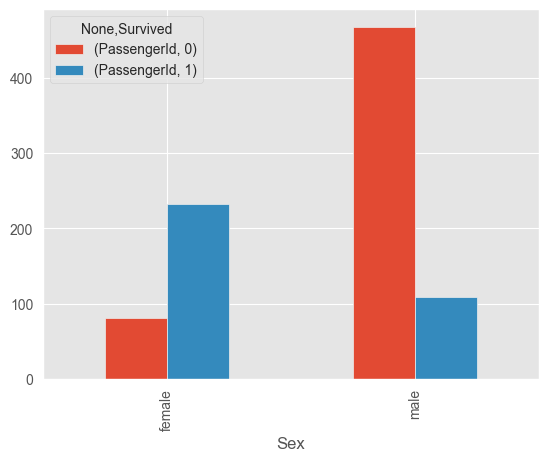

In [123]:
sex_df.plot.bar()

<Axes: xlabel='Pclass'>

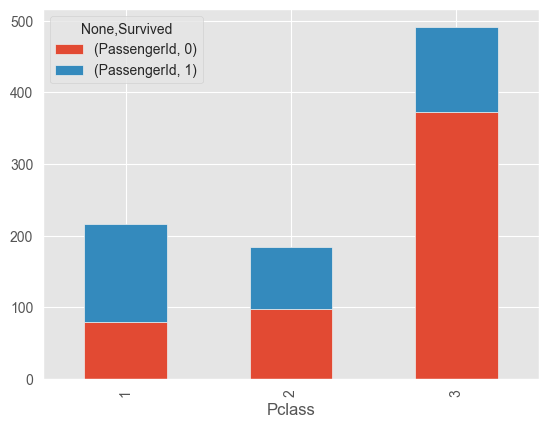

In [124]:
pclass_df = train_df[['Pclass', 'Survived', 'PassengerId']].dropna().groupby(['Pclass', 'Survived']).count().unstack()
pclass_df.plot.bar(stacked=True)

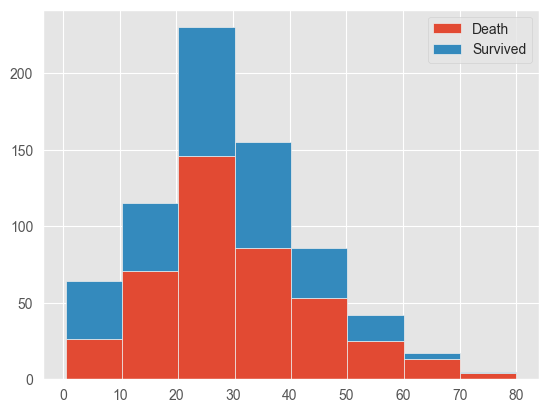

In [125]:
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]], bins=8, histtype='barstacked', label=["Death", "Survived"]) # histtype='barstacked' : 여러 히스토그램이 동시에 보이게 하기 위함
plt.legend() # 내부에 레이블 표기

In [126]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_df_corr[['Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

In [127]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


In [128]:
train_corr = train_df_corr[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch'
 , 'Fare','Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].corr() # corr : 상관계수화

In [129]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


<Axes: >

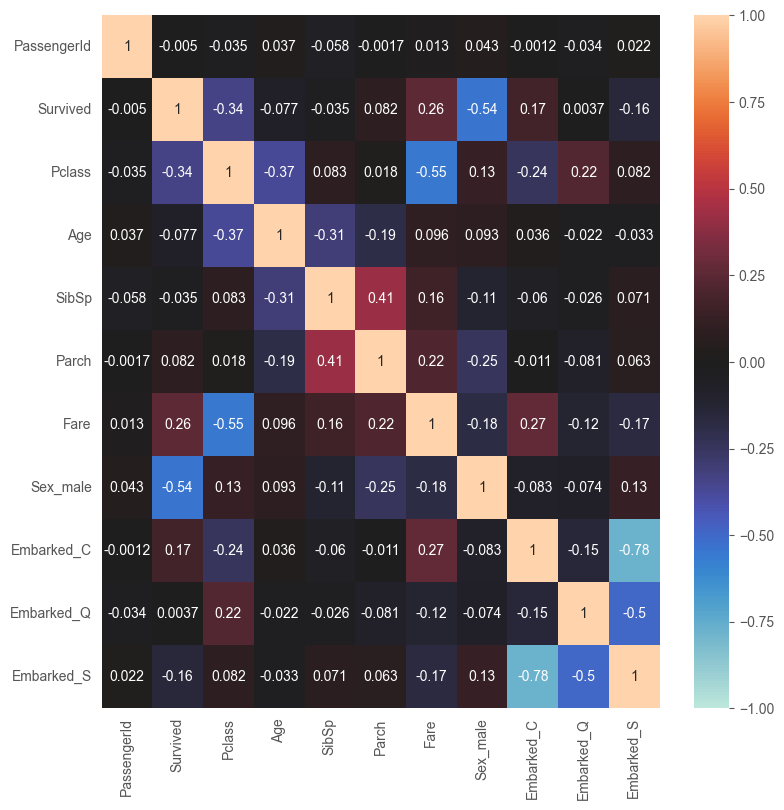

In [130]:
# 히트맵으로 시각화
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True) # annot=True로 각 칸에 숫자가 나옴

히트맵(상관계수) 보는 법: 0에가까울수록 두 변수는 상관관계가 없다고 판단.